In [1]:
!pip install quantecon_book_networks

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

In [4]:
import numpy as np

In [53]:
mip = pd.read_csv('../resources/MIP  - Hoja 1 (2).csv', index_col=0)

In [54]:
columnas = mip.columns

In [55]:
for col in columnas:
  mip[col] = mip[col].astype(float)

In [57]:
# no los vamos a droppear porque participan en el grafo aunque solo como sumideros
to_drop_by_row = [ col for col in columnas
   if (mip.loc[col,:].sum() == 0.0)]

to_drop_by_col = [ col for col in columnas
   if (mip.loc[:, col].sum() == 0.0)]

to_drop_by_row, to_drop_by_col

(['Enseñanza pública', 'Salud humana pública', 'Servicios sociales'], [])

In [48]:
mip.sum(axis=1)

Cultivo de cereales, oleaginosas y forrajeras                                     5763508.02
Cultivo de hortalizas, legumbres, flores y plantas ornamentales                    557481.67
Cultivo de frutas y nueces                                                         407583.33
Cultivos industriales                                                             1582424.83
Producción de semillas                                                             715253.18
                                                                                     ...    
Servicios sociales                                                                      0.00
Servicios de saneamiento                                                            27389.77
Actividad de asociaciones                                                          515534.08
Servicios de cine, radio y televisión                                             1304582.63
Servicios personales, de reparación, actividades deportivas y de espar

In [19]:
# Armo la matriz de coeficientes técnicos.
#El secotr en la fila i le vende al sector en la columna j. En el grafo se representa como i --> j.

for i in range(mip.shape[0]):
  mip.iloc[i,:] /= mip.iloc[i,:].sum()

In [24]:
mip.sum(axis=1)

Cultivo de cereales, oleaginosas y forrajeras                                     1.0
Cultivo de hortalizas, legumbres, flores y plantas ornamentales                   1.0
Cultivo de frutas y nueces                                                        1.0
Cultivos industriales                                                             1.0
Producción de semillas                                                            1.0
                                                                                 ... 
Servicios sociales                                                                0.0
Servicios de saneamiento                                                          1.0
Actividad de asociaciones                                                         1.0
Servicios de cine, radio y televisión                                             1.0
Servicios personales, de reparación, actividades deportivas y de esparcimiento    1.0
Length: 123, dtype: float64

In [20]:
mip.iloc[[110,116],:]

,"Cultivo de cereales, oleaginosas y forrajeras","Cultivo de hortalizas, legumbres, flores y plantas ornamentales",Cultivo de frutas y nueces,Cultivos industriales,Producción de semillas,"Cría de ganado y producción de leche, lana y pelos",Producción de granja,Servicios agropecuarios,Caza,Silvicultura y extracción de madera,...,Enseñanza pública,Enseñanza privada,Salud humana pública,Salud humana privada,Servicios veterinarios,Servicios sociales,Servicios de saneamiento,Actividad de asociaciones,"Servicios de cine, radio y televisión","Servicios personales, de reparación, actividades deportivas y de esparcimiento"
Servicios a las empresas y profesionales,0.000718,0.000166,0.000114,0.000190,0.000093,0.000793,0.000473,0.000121,0.000001,0.000347,...,0.003929,0.010216,0.007436,0.029850,0.000095,0.001394,0.026819,0.016192,0.018584,0.027990
Salud humana privada,0.001309,0.000479,0.000722,0.001434,0.000125,0.001237,0.000422,0.000105,0.000002,0.000187,...,0.014183,0.010809,0.149871,0.752836,0.003269,0.005645,0.000000,0.000708,0.000055,0.017979


In [ ]:
mip.index

Index(['Cultivo de cereales, oleaginosas y forrajeras',
       'Cultivo de hortalizas, legumbres, flores y plantas ornamentales',
       'Cultivo de frutas y nueces', 'Cultivos industriales',
       'Producción de semillas',
       'Cría de ganado y producción de leche, lana y pelos',
       'Producción de granja', 'Servicios agropecuarios', 'Caza',
       'Silvicultura y extracción de madera',
       ...
       'Enseñanza pública', 'Enseñanza privada', 'Salud humana pública',
       'Salud humana privada', 'Servicios veterinarios', 'Servicios sociales',
       'Servicios de saneamiento', 'Actividad de asociaciones',
       'Servicios de cine, radio y televisión',
       'Servicios personales, de reparación, actividades deportivas y de esparcimiento'],
      dtype='object', length=123)

In [58]:
mip.to_csv("../resources/MIP_normalizada.csv")

In [26]:
graph = mip.copy()
graph = graph.values

In [27]:
# Removemos aristas a si mismas, solo para graficar
for i in range(mip.shape[0]):
    graph[i,i] = 0

In [28]:
graph.shape

(123, 123)

In [29]:
g = nx.Graph(graph)

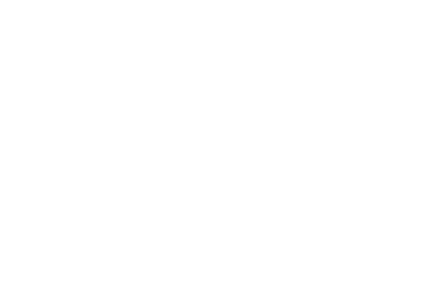

In [30]:
#Primer test
nx.draw(g, pos=nx.spring_layout(g))

In [ ]:
?? qbn_plt.plot_graph # Uso esta implementación.

In [ ]:
grado_nodo = np.zeros(len(graph)) # Me fijo el grado de cada nodo segun un umbral. (No cuento aristas con poco peso)
for i in range(len(graph)):
  aristas = 0;
  for j in range(len(graph)):
    if graph[i][j] > 0.2:
      aristas = aristas + 1
  grado_nodo[i] = aristas


In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.axis("off")

G = nx.DiGraph()
N = len(graph)
centrality = qbn_io.eigenvector_centrality(mip) #Funcion para sacar colores lindos para el grafo.
colores_nodo = qbn_io.colorise_weights(centrality,beta=False)

#Agrego nodos.
for i, w in enumerate(valores_intermedios.iloc[:,0]):
  G.add_node(mip.columns[i], weight = w, name=mip.columns[i])



tamaños_nodo = 400 + (grado_nodo * 200)
edge_colors = []
edge_widths = []
for i in range(N):
  for j in range(N):
    a = graph[i,j]
    G.add_edge(mip.columns[i], mip.columns[j])
    edge_colors.append(colores_nodo[i])
    width = a
    edge_widths.append(width)

pos_nodos = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       pos_nodos,
                       node_color=colores_nodo,
                       node_size=tamaños_nodo,
                       edgecolors='grey',
                       linewidths=10,
                       alpha=0.6,
                       ax=ax
                       )

nx.draw_networkx_edges(G,
                      pos_nodos,
                      edge_color=edge_colors,
                      width=edge_widths,
                      arrows=True,
                      arrowsize=5,
                      alpha=0.6,
                      ax=ax,
                      arrowstyle='->',
                      node_size= 10,
                      connectionstyle='arc3,rad=0.15')

nx.draw_networkx_labels(G,
                       pos_nodos,
                       font_size=7,
                       ax=ax
)


plt.show()

Output hidden; open in https://colab.research.google.com to view.